### Strokdem

In [1]:
import pandas as pd 
import os
import shutil
import glob
import numpy
import plotnine as p9
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
STUDY_PATH="/NAS/tupac/protocoles/Strokdem/"
TS_PATH=os.path.join(STUDY_PATH,"TractSeg")
OUT_PATH=os.path.join(TS_PATH,"data")
CODE_DIR=os.path.join(TS_PATH,"code")
LOG_DIR=os.path.join(CODE_DIR,"log")

In [9]:
df_data = pd.read_excel(os.path.join(TS_PATH,'dti_database.xlsx'),engine='openpyxl',index_col=0,sheet_name="M6")
df_data.describe()

,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_data.columns

Index(['T1 – DICOM', 'T1 – NIFTI', 'DTI 1 – DICOM', 'DTI 1 – NIFTI',
       'DTI 2 – DICOM', 'DTI 2 – NIFTI', 'DTI3 – NIFTI', 'DTI CORR – DICOM',
       'DTI CORR – NIFTI', 'Unnamed: 10',
       ...
       'Unnamed: 1014', 'Unnamed: 1015', 'Unnamed: 1016', 'Unnamed: 1017',
       'Unnamed: 1018', 'Unnamed: 1019', 'Unnamed: 1020', 'Unnamed: 1021',
       'Unnamed: 1022', 'Unnamed: 1023'],
      dtype='object', length=1023)

In [13]:
df_data.index

Index(['510702MFB', '540724JLC', '571216AT', '431031JPC', '260410AV',
       '350605MM', '640425SV', '381020LF', '300403PP', '470323DV',
       ...
       '470924PV', '620830MF', '640107GB', '451109PC', '390215BH', '370817FC',
       '480920EF', '510615BM', '661117OP', '490531LS'],
      dtype='object', name='SUBJ', length=206)

In [14]:
#ind1 ceux qui ont au moins un DTI
ind1=df_data[df_data['DTI 1 – NIFTI'].str.contains('dwi=')].index
ind1_inv=df_data[df_data['DTI 1 – NIFTI'].str.contains('no dwi')].index

#ind2 ceux qui ont le second DTI
ind2=df_data[df_data['DTI 2 – NIFTI'].str.contains('dwi=')].index
ind2_inv=df_data[df_data['DTI 2 – NIFTI'].str.contains('no dwi')].index

#ind3 ceux qui ont une correction
ind3=df_data[df_data['DTI CORR – NIFTI'].str.contains('dwi=')].index
ind3_inv=df_data[df_data['DTI CORR – NIFTI'].str.contains('no dwi')].index

#ind2 ceux qui ont le second DTI
#ind_cp=df_data[df_data['DTI3 – NIFTI'].str.contains('dwi=')].index
#ind_cp_inv=df_data[df_data['DTI3 – NIFTI'].str.contains('no dwi')].index

print(len(ind1),len(ind1_inv),len(ind1)+len(ind1_inv))
print(len(ind2),len(ind2_inv),len(ind2)+len(ind2_inv))
print(len(ind3),len(ind3_inv),len(ind3)+len(ind3_inv))
#print(len(ind_cp),len(ind_cp_inv),len(ind_cp)+len(ind_cp_inv))


177 29 206
165 41 206
120 86 206


In [15]:
#cas1 ceux qui ont 2 DTI et 1 correction
cas1=ind1.intersection(ind2).intersection(ind3)
print(len(cas1))
#cas2 ceux qui ont 2 DTI mais pas de correction
cas2=ind1.intersection(ind2).intersection(ind3_inv)
print(len(cas2))
#cas3 ceux qui ont 1 DTI et 1 correction
cas3=ind1.intersection(ind2_inv).intersection(ind3)
print(len(cas3))
#cas4 ceux qui ont 1 DTI et pas de correction
cas4=ind1.intersection(ind2_inv).intersection(ind3_inv)
print(len(cas4))
print(len(ind1_inv.intersection(ind2_inv).intersection(ind3_inv)))

118
47
2
10
29


In [16]:
#RQ ce sont deux facons identiques d'obtenir le groupe de ceux n'ayant que 1 DTI
print(ind1.intersection(ind2_inv))
print(set(ind1)-set(ind2))

Index(['510702MFB', '540724JLC', '571216AT', '431031JPC', '260410AV',
       '381020LF', '260403JD', '490401AD', '470815CM_i', '610415JD_i',
       '510807WC_i', '630418CM_i'],
      dtype='object', name='SUBJ')
{'490401AD', '381020LF', '470815CM_i', '540724JLC', '571216AT', '260403JD', '510807WC_i', '431031JPC', '510702MFB', '260410AV', '610415JD_i', '630418CM_i'}


In [108]:
#1 DTI
for SUBJ in ind1.intersection(ind2_inv):
    IMA=df_data.loc[SUBJ]['DTI 1 – NIFTI'][4:]
    SUBJ_PATH=os.path.join(OUT_PATH,SUBJ)
    DTI_FILE=os.path.join(SUBJ_PATH,"dti_"+SUBJ+".nii.gz")

    if not os.path.isdir(SUBJ_PATH) :
        os.mkdir(SUBJ_PATH)
    if not os.path.isfile(DTI_FILE) :
        shutil.copy(IMA,DTI_FILE)
    
    if not os.path.isfile(DTI_FILE.split('.')[0]+".bval") :        
        shutil.copy(IMA.split('.')[0]+".bval",DTI_FILE.split('.')[0]+".bval")
    
    if not os.path.isfile(DTI_FILE.split('.')[0]+".bvec") :
        shutil.copy(IMA.split('.')[0]+".bvec",DTI_FILE.split('.')[0]+".bvec")

In [109]:
#2 DTI
for SUBJ in ind1.intersection(ind2):
    IMA_1=df_data.loc[SUBJ]['DTI 1 – NIFTI'][4:]
    IMA_2=df_data.loc[SUBJ]['DTI 2 – NIFTI'][4:]
    SUBJ_PATH=os.path.join(OUT_PATH,SUBJ)
    DTI_FILE=os.path.join(SUBJ_PATH,"dti_"+SUBJ+".nii.gz")

    if not os.path.isdir(SUBJ_PATH) :
        os.mkdir(SUBJ_PATH)

    if not os.path.isfile(DTI_FILE) :
        !fslmerge -t $DTI_FILE $IMA_1 $IMA_2
    
    for VAL in [".bvec",".bval"] :
        tmp1=IMA_1.split('.')[0]+VAL
        tmp2=IMA_2.split('.')[0]+VAL
        tmp=os.path.join(SUBJ_PATH,'''dti_'''+SUBJ+VAL)
        if not os.path.isfile(tmp) :
            !paste -d " " $tmp1 $tmp2 > $tmp


          Merge will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!



In [17]:
ind1.intersection(ind_cp)

NameError: name 'ind_cp' is not defined

In [ ]:
#3 DTI
for SUBJ in ind1.intersection(ind_cp):
    IMA_1=df_data.loc[SUBJ]['DTI 1 – NIFTI'][4:]
    IMA_2=df_data.loc[SUBJ]['DTI 2 – NIFTI'][4:]
    IMA_3=df_data.loc[SUBJ]['DTI 3 – NIFTI'][4:]
    
    SUBJ_PATH=os.path.join(OUT_PATH,SUBJ+'_i')
    DTI_FILE=os.path.join(SUBJ_PATH,"dti_"+SUBJ+".nii.gz")

    if not os.path.isdir(SUBJ_PATH) :
        os.mkdir(SUBJ_PATH)

    if not os.path.isfile(DTI_FILE) :
        !fslmerge -t $DTI_FILE $IMA_1 $IMA_2
    
    for VAL in [".bvec",".bval"] :
        tmp1=IMA_1.split('.')[0]+VAL
        tmp2=IMA_2.split('.')[0]+VAL
        tmp=os.path.join(SUBJ_PATH,'''dti_'''+SUBJ+VAL)
        if not os.path.isfile(tmp) :
            !paste -d " " $tmp1 $tmp2 > $tmp

In [110]:
#Pour ceux qui ont une correction
for SUBJ in ind3:
    SUBJ_PATH=os.path.join(OUT_PATH,SUBJ)
    DTI_CORR_FILE=os.path.join(SUBJ_PATH,"b0_PA_"+SUBJ+".nii.gz")
    DTI_PAIR=os.path.join(SUBJ_PATH,"b0_pair_"+SUBJ+".nii.gz")
    IMA=df_data.loc[SUBJ]['DTI CORR – NIFTI'][4:]
    
    if not os.path.isdir(SUBJ_PATH) :
        os.mkdir(SUBJ_PATH)
    
    if not os.path.isfile(DTI_CORR_FILE):
        shutil.copy(IMA,DTI_CORR_FILE)
    
    DTI_FILE=os.path.join(SUBJ_PATH,"dti_"+SUBJ+".nii.gz")
    BVAL_FILE=os.path.join(SUBJ_PATH,"dti_"+SUBJ+".bval")
    BVEC_FILE=os.path.join(SUBJ_PATH,"dti_"+SUBJ+".bvec")
    
    if not os.path.isfile(DTI_PAIR):
        CMD="dwiextract -force -bzero DTI_FILE -fslgrad "+BVEC_FILE+" "+BVAL_FILE+" - | mrmath - mean - -axis 3 |mrcat - "+DTI_CORR_FILE+" -axis 3 "+DTI_PAIR
        print(CMD)
        ! dwiextract -force -bzero $DTI_FILE -fslgrad $BVEC_FILE $BVAL_FILE - | mrmath - mean - -axis 3 |mrcat - $DTI_CORR_FILE -axis 3 $DTI_PAIR

dwiextract -force -bzero DTI_FILE -fslgrad /NAS/tupac/protocoles/Strokdem/TractSeg/data/280515LD/dti_280515LD.bvec /NAS/tupac/protocoles/Strokdem/TractSeg/data/280515LD/dti_280515LD.bval - | mrmath - mean - -axis 3 |mrcat - /NAS/tupac/protocoles/Strokdem/TractSeg/data/280515LD/b0_PA_280515LD.nii.gz -axis 3 /NAS/tupac/protocoles/Strokdem/TractSeg/data/280515LD/b0_pair_280515LD.nii.gz
dwiextract: [WARNING] existing output files will be overwritten
dwiextract: [100%] uncompressing image "/NAS/tupac/protocoles/Strokdem/TractSeg/data/280515LD/dti_280515LD.nii.gz"[0K
dwiextract: [100%] extracting volumes[0K
mrmath: [100%] preloading data for "/tmp/mrtrix-tmp-pWH6ow.mif"[0K
mrmath: [100%] computing mean along axis 3...[0K
mrcat: [ERROR] Unable to concatenate 2 images along axis 3: 
mrcat: [ERROR] Images "/tmp/mrtrix-tmp-xsQWPP.mif" and "/NAS/tupac/protocoles/Strokdem/TractSeg/data/280515LD/b0_PA_280515LD.nii.gz" have inequal sizes along axis 3 (64 vs 60)
dwiextract -force -bzero DTI_FILE -fsl

In [125]:
cpt=0
for SUBJ in ind1:
    SUBJ_PATH=os.path.join(OUT_PATH,SUBJ)
    if (not os.path.isfile(os.path.join(SUBJ_PATH,"whole_brain.tck"))):
        CMD="qbatch -q one_job_q -oe "+LOG_DIR+" -N s_"+SUBJ+" bash "+os.path.join(CODE_DIR,"dti_process.sh ")+" "+SUBJ 
        print(CMD)
    else :
        cpt=cpt+1
print(cpt,'/',len(ind1))

177 / 177


DENOISED_DTI_FILE=os.path.join(SUBJ_PATH,"denoised_"+os.path.basename(DTI_FILE))
if not os.path.isfile(DENOISED_DTI_FILE) :
    CMD="qbatch -q three_job_q -oe "+LOG_DIR+" -N s_"+SUBJ+" dwidenoise "+DTI_FILE+" "+DENOISED_DTI_FILE+" -noise "+os.path.join(SUBJ_PATH,"noise.nii.gz")

GIBBS_DTI_FILE=os.path.join(SUBJ_PATH,"gibbs_"+os.path.basename(DENOISED_DTI_FILE))
if not os.path.isfile(GIBBS_DTI_FILE) :
    CMD="qbatch -q three_job_q -oe "+LOG_DIR+" -N s2_"+SUBJ+" mrdegibbs "+DENOISED_DTI_FILE+" "+GIBBS_DTI_FILE+" -axes 0,1 "
  #print(CMD)

(174, 98)
(100, 98)


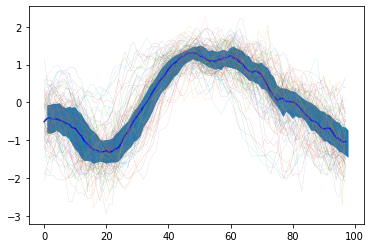

In [302]:
liste_files=glob.glob(os.path.join(OUT_PATH,'''*''','''FA_tractometry.csv'''))
data_list=[]
for file in liste_files:
    CQData = pd.read_csv(file,sep=';')
    data_list.append(CQData['CST_left'])

data_nd=numpy.asarray(data_list)
print(data_nd.shape)
data=stats.zscore(data_nd[numpy.mean(data_nd,axis=1)>0.3],axis=1)
print(data.shape)

plt.plot(numpy.median(data,axis=0),'b')
plt.fill_between(numpy.linspace(1,98,98),numpy.percentile(data,25,axis=0),numpy.percentile(data,75,axis=0))
plt.plot(numpy.transpose(data),linewidth=0.1)

#plt.plot(numpy.percentile(data,75,axis=0))
#plt.plot(numpy.flipud(numpy.mean(CST_right_nd[numpy.mean(CST_right_nd,axis=1)>0.3],axis=0)))
plt.show()

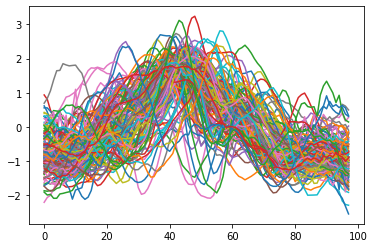

In [286]:
plt.plot(stats.zscore(numpy.transpose(data),axis=0))
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

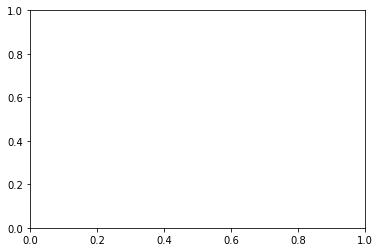

In [248]:
plt.errorbar(numpy.linspace(1,98,98),numpy.transpose(CST_right_nd))
plt.show()

In [246]:
CST_left_nd

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32725555, 0.33700776, 0.34176642, ..., 0.29913417, 0.30827135,
        0.30886787],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35227272, 0.34589455, 0.35369948, ..., 0.29080233, 0.28115797,
        0.27806398],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31310216, 0.3129909 , 0.30960312, ..., 0.28971419, 0.2813428 ,
        0.28775641]])

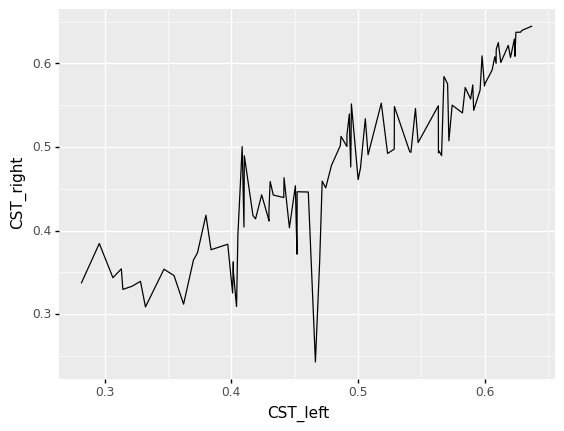

<ggplot: (8788074677429)>

In [142]:
p9.ggplot(CQData,p9.aes(x='CST_left', y='CST_right')) + p9.geom_line() 

In [253]:
df

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.327256,0.337008,0.341766,0.343162,0.349587,0.348557,0.349565,0.354972,0.356959,0.358175,...,0.291426,0.293017,0.296121,0.294434,0.292763,0.291166,0.301700,0.299134,0.308271,0.308868
1,0.327571,0.318197,0.315543,0.299690,0.291396,0.291758,0.290347,0.289966,0.296219,0.299924,...,0.326250,0.318781,0.314122,0.312650,0.310871,0.303852,0.300576,0.290257,0.289491,0.297678
2,0.394980,0.382456,0.377105,0.365963,0.360811,0.357314,0.353117,0.356851,0.354140,0.359791,...,0.342198,0.349983,0.345843,0.353770,0.359153,0.356228,0.355819,0.356033,0.350432,0.338294
3,0.468240,0.459908,0.440011,0.425828,0.418801,0.397577,0.398109,0.389165,0.378902,0.376726,...,0.332880,0.329481,0.325024,0.316735,0.316402,0.316425,0.320847,0.328508,0.331104,0.337140
4,0.392069,0.390909,0.392918,0.375509,0.377237,0.370535,0.379268,0.366613,0.363117,0.358549,...,0.383766,0.384672,0.378036,0.369589,0.367159,0.368299,0.358734,0.363248,0.357357,0.365071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.370560,0.371702,0.365049,0.363264,0.355313,0.354860,0.356133,0.354764,0.352975,0.352009,...,0.269724,0.274792,0.280574,0.285539,0.285495,0.293098,0.299957,0.301715,0.299354,0.298184
120,0.319779,0.319599,0.310554,0.310745,0.308618,0.310726,0.312827,0.307918,0.317236,0.327703,...,0.393526,0.413967,0.408782,0.424020,0.413571,0.417277,0.411262,0.415574,0.410667,0.394742
121,0.349245,0.347959,0.345012,0.342274,0.347617,0.352621,0.356573,0.358537,0.361157,0.365284,...,0.348428,0.355003,0.353456,0.351772,0.353340,0.347618,0.347235,0.359993,0.365569,0.374383
122,0.352273,0.345895,0.353699,0.361484,0.370784,0.375824,0.378764,0.384588,0.384312,0.385122,...,0.336610,0.332038,0.329496,0.329961,0.325092,0.324103,0.297403,0.290802,0.281158,0.278064


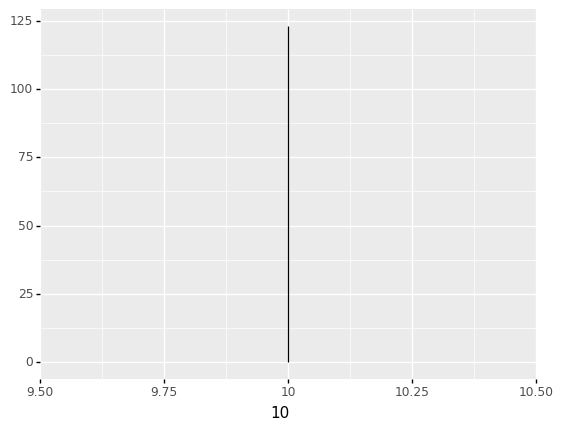

<ggplot: (8788073142265)>

In [259]:
p9.ggplot(df,p9.aes(x='10',y=df.index.values,)) + p9.geom_line() 

In [257]:
CQData[CST_left]

KeyError: "None of [Index([                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),\n                        (0.3272555470466614, 0.3370077610015869, 0.3417664170265198, 0.34316226840019226, 0.34958720207214355, 0.3485568165779114, 0.3495654463768005, 0.3549723029136658, 0.35695880651473993, 0.35817500948905945, 0.35375753045082087, 0.35373905301094055, 0.355992317199707, 0.354913979768753, 0.351774126291275, 0.35353496670722956, 0.35555174946784973, 0.3561185002326965, 0.35943832993507385, 0.3638188242912293, 0.3704569637775421, 0.3782936334609984, 0.391621857881546, 0.4043286442756653, 0.41458651423454285, 0.42321956157684326, 0.4276218116283417, 0.43344977498054493, 0.4376878440380096, 0.4465290606021881, 0.4532777965068817, 0.4636352658271789, 0.4771165549755096, 0.4904780089855193, 0.5047414898872375, 0.5202004313468933, 0.5322583317756653, 0.5447985529899597, 0.5508327484130859, 0.5501893162727356, 0.5406168699264526, 0.5370174050331117, 0.5264322757720947, 0.5173491835594177, 0.4987800717353821, 0.4790241122245789, 0.4634974002838135, 0.4514036178588867, 0.4396436810493469, 0.42115601897239685, 0.40360787510871887, 0.3947840631008148, 0.3921634554862976, 0.3970320224761962, 0.4068287909030914, 0.41916257143020635, 0.4363757371902465, 0.4534318149089812, 0.4701745808124543, 0.4835344254970551, 0.4964756667613984, 0.5017215609550476, 0.5014239549636842, 0.4968336522579193, 0.4895430207252502, 0.4815384149551392, 0.4721428453922272, 0.4603800475597382, 0.44656449556350714, 0.4329114854335785, 0.4234821200370789, 0.4141697585582733, 0.4022721350193024, 0.3909926414489746, 0.37727698683738714, 0.3651498556137085, 0.35372623801231384, 0.34120234847068787, 0.32970008254051203, 0.31675165891647333, 0.30628430843353277, 0.2937179207801819, 0.287952721118927, 0.28334459662437433, 0.28230851888656616, 0.2808766663074493, 0.2845790982246399, 0.2870566844940185, 0.29142624139785767, 0.29301732778549194, 0.2961205840110779, 0.2944338023662567, 0.2927626073360443, 0.291165679693222, 0.3017004132270813, 0.29913416504859924, 0.3082713484764099, 0.308867871761322),\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),\n                             (0.32757118344306946, 0.3181970417499542, 0.3155430257320404, 0.2996896207332611, 0.29139566421508784, 0.2917575240135193, 0.2903467118740082, 0.28996619582176203, 0.29621899127960205, 0.2999239265918732, 0.30874246358871454, 0.3147250115871429, 0.3141104876995086, 0.3292740285396576, 0.3382531404495239, 0.34515061974525446, 0.3584430813789368, 0.37466064095497126, 0.3847521841526032, 0.3992752730846405, 0.40625813603401184, 0.42783719301223755, 0.4377136826515198, 0.4441435635089874, 0.4514220654964447, 0.4581144452095032, 0.4622007310390472, 0.468241959810257, 0.4665960073471069, 0.4609899520874024, 0.4535877108573914, 0.4502911567687988, 0.456836611032486, 0.4652948677539826, 0.4707341194152832, 0.4801959097385407, 0.4955678284168243, 0.5162657499313354, 0.5204319357872009, 0.5170528292655945, 0.4991686344146729, 0.4909425973892212, 0.4931178390979767, 0.4940255284309388, 0.492107331752777, 0.4795388877391814, 0.4656635522842407, 0.4544752538204193, 0.4462017714977264, 0.44135224819183355, 0.4296767115592957, 0.4173880815505981, 0.4036876857280731, 0.3959269821643828, 0.3919447064399719, 0.38833320140838623, 0.3865776360034944, 0.388375997543335, 0.3922349214553833, 0.395010381937027, 0.3905417323112487, 0.38406822085380554, 0.3820434510707855, 0.3890102505683898, 0.3962659537792205, 0.3966317176818848, 0.39270952343940735, 0.38534533977508545, 0.3767663836479187, 0.3666977882385254, 0.3608668148517609, 0.3522157073020935, 0.3426510095596313, 0.33667758107185364, 0.3331693112850189, 0.3309007287025452, 0.33084836602211, 0.332385390996933, 0.3389661014080048, 0.3414320051670074, 0.342942327260971, 0.34215360879898077, 0.3456745147705078, 0.3442550599575043, 0.3396066129207611, 0.33632308244705206, 0.336387038230896, 0.32819050550460815, 0.32625049352645874, 0.31878119707107544, 0.31412228941917414, 0.31264960765838623, 0.3108712136745453, 0.30385211110115046, 0.30057573318481445, 0.2902572154998779, 0.28949105739593506, 0.2976780533790588),\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),\n                    (0.39498019218444813, 0.38245648145675654, 0.3771054744720458, 0.36596331000328064, 0.3608105182647705, 0.3573141098022461, 0.35311704874038696, 0.3568510711193085, 0.354139506816864, 0.359790712594986, 0.3623299598693849, 0.3597575724124908, 0.35989245772361755, 0.35661801695823664, 0.3547774255275726, 0.35563793778419495, 0.3598232269287109, 0.36598348617553716, 0.36855593323707586, 0.3758804500102996, 0.38001304864883423, 0.388956069946289, 0.40170061588287354, 0.4126419425010681, 0.4232938587665558, 0.4328275620937347, 0.4384313821792602, 0.44319698214530945, 0.4521002769470215, 0.4589017927646637, 0.4643939137458801, 0.4683371484279633, 0.4707803726196289, 0.4764752388000488, 0.4861207306385041, 0.4999668896198273, 0.511864185333252, 0.5211318731307983, 0.5265303254127502, 0.5250162482261658, 0.517598271369934, 0.5106260776519775, 0.5030638575553894, 0.5009313225746154, 0.5024974346160889, 0.5125914216041565, 0.5178589224815369, 0.5239219069480897, 0.5253698229789734, 0.5247557759284973, 0.5188173055648804, 0.5072808265686035, 0.4893562197685242, 0.4684622883796692, 0.4500176608562469, 0.4409068822860718, 0.43779078125953674, 0.4310409724712372, 0.4275504946708679, 0.4239505231380464, 0.4208212792873383, 0.4203020036220551, 0.4198421239852905, 0.4195490479469299, 0.41532766819000244, 0.4096925854682921, 0.4015463888645172, 0.3898075520992279, 0.37680801749229437, 0.3609397113323212, 0.34829235076904297, 0.33827799558639526, 0.3304796814918518, 0.3264792859554291, 0.3236095905303955, 0.3211257755756378, 0.31933027505874634, 0.31899318099021917, 0.3201011121273041, 0.32572299242019653, 0.3291197121143341, 0.3342586159706116, 0.33838751912117004, 0.34279209375381464, 0.34175595641136164, 0.34552690386772156, 0.3430493175983429, 0.3474691212177277, 0.3421977162361145, 0.34998264908790583, 0.3458433747291565, 0.3537696301937103, 0.35915252566337585, 0.3562275469303131, 0.35581913590431213, 0.35603272914886475, 0.35043156147003174, 0.3382942378520965),\n                       (0.4682397246360779, 0.4599079191684723, 0.44001129269599926, 0.42582768201828, 0.41880130767822266, 0.39757719635963445, 0.3981085419654847, 0.3891647160053253, 0.3789021074771881, 0.3767261505126953, 0.37515345215797424, 0.3737375140190125, 0.3732084333896637, 0.3745901584625244, 0.3780835866928101, 0.386934459209442, 0.4007599055767059, 0.4105758965015411, 0.41605019569396967, 0.42549285292625433, 0.43644642829895014, 0.4517613649368287, 0.4676899909973144, 0.4787264466285705, 0.4829649329185486, 0.4822616875171661, 0.4828577637672424, 0.4899247288703918, 0.4971666932106017, 0.5042092800140381, 0.5128780603408813, 0.5169749855995178, 0.5115555524826049, 0.4915880262851715, 0.4660491645336151, 0.4495212733745575, 0.4440884292125702, 0.4490576982498169, 0.4603503048419952, 0.4742133021354675, 0.4935885369777681, 0.5122299194335938, 0.526807963848114, 0.5327057838439941, 0.5364042520523071, 0.5365142822265624, 0.5217750072479249, 0.5062089562416077, 0.4858720600605011, 0.4771672189235688, 0.457710474729538, 0.4518207013607025, 0.4416614174842834, 0.42875760793685913, 0.4098171293735504, 0.3981336057186127, 0.388590395450592, 0.3753992319107056, 0.36857727169990534, 0.3571184575557709, 0.35184660553932184, 0.35648781061172485, 0.3661845028400421, 0.3712595403194427, 0.37473964691162104, 0.3740686178207397, 0.3702701926231384, 0.36433312296867365, 0.3600033223628998, 0.35324847698211664, 0.35188868641853327, 0.3478012084960937, 0.3495011031627655, 0.3493376076221466, 0.3481372892856598, 0.3491199314594269, 0.35123497247695923, 0.35398101806640625, 0.35762691497802734, 0.35660877823829645, 0.35423031449317927, 0.3500266969203949, 0.3496708273887634, 0.3458248376846313, 0.3453398048877716, 0.33962503075599676, 0.33876276016235357, 0.3364650011062622, 0.33287993073463434, 0.32948070764541626, 0.32502448558807373, 0.3167348802089691, 0.31640207767486567, 0.3164249658584595, 0.32084667682647705, 0.32850831747055054, 0.3311039507389069, 0.337139755487442),\n                            (0.39206850528717047, 0.39090943336486816, 0.3929176032543182, 0.3755094110965729, 0.3772373795509337, 0.37053498625755316, 0.37926810979843134, 0.36661347746849055, 0.36311727762222284, 0.3585487604141236, 0.36794304847717285, 0.36906304955482483, 0.3739325106143952, 0.37590900063514715, 0.3718308806419373, 0.37211310863494873, 0.3718612492084503, 0.37135595083236683, 0.3778105974197388, 0.380980521440506, 0.37916904687881464, 0.37480419874191284, 0.3892174661159515, 0.4009708762168884, 0.4134093225002288, 0.4296514093875885, 0.4398587346076965, 0.4511025547981262, 0.4622071981430054, 0.476647287607193, 0.4898335933685303, 0.4925317764282227, 0.4938724935054778, 0.5008924007415771, 0.5133156180381776, 0.5248546600341797, 0.536304235458374, 0.542773962020874, 0.5525559782981873, 0.5596883296966552, 0.561376690864563, 0.5618152022361755, 0.5562438368797303, 0.5583890080451965, 0.5649130940437318, 0.5736739039421082, 0.574005126953125, 0.5570287704467772, 0.534697949886322, 0.5181189775466919, 0.4981842935085297, 0.4762020409107208, 0.4538158178329468, 0.433931976556778, 0.4226112067699431, 0.41387298703193665, 0.4015086591243744, 0.390916109085083, 0.3765082359313965, 0.3605364561080933, 0.3529990613460541, 0.3555822968482971, 0.3575292229652404, 0.3631428480148315, 0.3657324016094208, 0.3641496598720551, 0.3583601415157318, 0.35393574833869934, 0.35700666904449463, 0.3653852045536041, 0.3736423552036285, 0.3780240714550018, 0.37964493036270147, 0.3793472647666931, 0.37322998046875, 0.36864408850669855, 0.3677779734134674, 0.36157429218292236, 0.36516511440277094, 0.36141678690910334, 0.3624375760555267, 0.36575976014137274, 0.37138393521308893, 0.37266343832015997, 0.375918447971344, 0.37617155909538263, 0.3809660375118256, 0.3780165910720825, 0.38376629352569586, 0.3846718668937683, 0.3780357539653778, 0.3695888519287109, 0.3671585619449616, 0.3682988584041595, 0.35873427987098694, 0.3632483780384064, 0.3573569059371948, 0.36507147550582886),\n                      (0.30257245898246765, 0.3081745207309723, 0.3100397884845734, 0.3155725598335266, 0.31989821791648865, 0.3229540288448334, 0.33307382464408875, 0.3305276036262512, 0.33730351924896246, 0.33728745579719543, 0.3391806483268737, 0.33784520626068115, 0.3360314071178436, 0.3325926661491394, 0.3322820365428924, 0.3317927718162537, 0.33933186531066895, 0.3398080468177796, 0.35038438439369207, 0.3540074527263641, 0.3650867342948914, 0.3699744045734406, 0.3851831555366516, 0.400603711605072, 0.41367757320404047, 0.430162787437439, 0.4409505426883698, 0.4565688073635101, 0.4691081941127776, 0.4810121655464173, 0.4959306418895722, 0.4977917671203613, 0.5018103718757629, 0.5053372383117677, 0.5033469796180724, 0.4995987117290497, 0.4906483292579651, 0.4799893498420716, 0.4734101891517638, 0.4722493290901185, 0.4744220077991485, 0.4792380034923553, 0.4834341108798981, 0.4972205758094788, 0.5076628923416138, 0.5162687301635743, 0.5272541642189025, 0.5328168869018554, 0.5318359136581421, 0.5342284440994263, 0.5315962433815001, 0.5275049805641174, 0.5203055143356323, 0.5090968012809755, 0.4957584142684937, 0.4789729416370392, 0.4561310708522797, 0.4337758421897888, 0.4072163999080658, 0.3841746747493744, 0.3659601807594299, 0.35541620850563044, 0.34852576255798334, 0.3416195809841156, 0.33516028523445124, 0.334556519985199, 0.33724385499954224, 0.3388686180114746, 0.3411588668823242, 0.34131479263305664, 0.34371626377105713, 0.3451617658138275, 0.3464299440383911, 0.34607565402984614, 0.34547409415245056, 0.34402531385421753, 0.34787330031394953, 0.35484498739242554, 0.3664799332618713, 0.38084113597869873, 0.39196023344993597, 0.3992637395858765, 0.4055041372776032, 0.4110462367534637, 0.4104713797569274, 0.4072511494159698, 0.4092668294906617, 0.4091287851333618, 0.4078739285469056, 0.40535300970077515, 0.4035577178001404, 0.4046890735626221, 0.4076279997825623, 0.4110212624073029, 0.40724632143974304, 0.41010978817939764, 0.395262986421585, 0.39412602782249445),\n       ...\n                                     (0.3737571537494659, 0.3704122602939606, 0.37134900689125055, 0.37327590584754944, 0.38378658890724177, 0.3837637603282928, 0.3892934620380402, 0.39760243892669683, 0.4082989394664765, 0.411589115858078, 0.4137717485427856, 0.4072715640068055, 0.3996731042861938, 0.3987347483634949, 0.398467868566513, 0.4015419483184814, 0.4045014977455139, 0.401077926158905, 0.4012788534164429, 0.4034702479839325, 0.40863353013992315, 0.4094647169113159, 0.402280867099762, 0.3939124047756195, 0.3871114253997802, 0.383887380361557, 0.3855607509613037, 0.3817265331745148, 0.3770639896392822, 0.37522342801094055, 0.37999364733695984, 0.3869718015193939, 0.3971148431301117, 0.4133581817150116, 0.4357846677303314, 0.4541595876216888, 0.4700337648391724, 0.4786663651466369, 0.4910914301872253, 0.5066702961921692, 0.5268068313598633, 0.5446986556053162, 0.5575368404388428, 0.5668176412582397, 0.5713923573493958, 0.5775135159492493, 0.5818806886672974, 0.5812278389930725, 0.5804588794708252, 0.5758752822875977, 0.5716192126274108, 0.5691357254981994, 0.5602784752845764, 0.5440427660942078, 0.5241581201553345, 0.5025148391723633, 0.4848751723766327, 0.4732553660869599, 0.4684381783008575, 0.4693532586097716, 0.4729540646076202, 0.4780839085578918, 0.4851282835006714, 0.489398032426834, 0.4897836744785309, 0.4844628572463988, 0.4726869165897368, 0.4621042311191559, 0.4572735130786896, 0.4484182000160217, 0.4340800344944, 0.4259633421897888, 0.406959056854248, 0.38619500398635853, 0.3623811602592468, 0.3398297429084777, 0.32139015197753906, 0.31501299142837524, 0.31680953502655024, 0.326543927192688, 0.33721137046813965, 0.3467133641242981, 0.3547226190567017, 0.35602110624313354, 0.3587683439254761, 0.3545125126838684, 0.3488836884498596, 0.3439069092273712, 0.3409917652606964, 0.34265902638435364, 0.3507768213748932, 0.34300073981285095, 0.3400183618068695, 0.3386538624763489, 0.33330291509628296, 0.33048486709594727, 0.33062213659286493, 0.3239801526069641),\n                (0.33080199360847473, 0.3281168341636658, 0.32384479045867914, 0.3232698142528534, 0.3202596604824066, 0.3226585388183594, 0.32399091124534607, 0.3272792994976044, 0.33358669281005854, 0.33753278851509094, 0.34381103515625, 0.3505732119083404, 0.35300144553184504, 0.3599575459957122, 0.3647916615009308, 0.37641409039497375, 0.38398277759552, 0.39281794428825373, 0.3945285677909851, 0.3961209654808045, 0.3996087312698364, 0.4004550576210022, 0.3984453678131104, 0.3926139175891876, 0.3856096267700195, 0.38256791234016413, 0.38573330640792847, 0.39483606815338124, 0.4053186178207397, 0.4152116775512695, 0.4277971684932709, 0.44566431641578674, 0.4599078893661499, 0.4692221581935882, 0.4728322923183441, 0.4776490926742554, 0.485270768404007, 0.4980247020721437, 0.5065206885337828, 0.5126485228538513, 0.5176538825035095, 0.5139359235763549, 0.5129550695419312, 0.5011705160140991, 0.4919125437736511, 0.4900334179401398, 0.4830188453197479, 0.4788002371788025, 0.4693934917449951, 0.4583618938922881, 0.44541299343109125, 0.434705913066864, 0.42679521441459656, 0.42095330357551564, 0.4236046373844147, 0.42711219191551203, 0.4288113713264465, 0.43031385540962214, 0.42547556757926946, 0.41979217529296886, 0.4117779135704041, 0.4049357175827026, 0.40268930792808527, 0.3995807468891143, 0.39737561345100403, 0.3945342302322388, 0.38478890061378485, 0.37606716156005854, 0.3671920299530029, 0.3597867786884308, 0.34832561016082764, 0.33790200948715204, 0.3279458582401276, 0.3221999704837799, 0.3167418837547302, 0.3084649443626404, 0.3043921887874603, 0.30240872502326965, 0.2989007532596588, 0.30036163330078125, 0.29572859406471247, 0.30172789096832275, 0.3026596009731293, 0.3065509498119354, 0.3031651079654694, 0.3025272488594055, 0.3054232597351075, 0.3037998378276825, 0.3080667853355408, 0.3064941465854645, 0.30619415640830994, 0.30107709765434265, 0.3021435737609863, 0.29613596200942993, 0.3011857271194458, 0.30015721917152405, 0.2984426319599152, 0.29446959495544434),\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),\n                     (0.39899334311485285, 0.39681905508041376, 0.3929297029972077, 0.3839454352855681, 0.3787988424301147, 0.3737594485282898, 0.3632727265357971, 0.3605863451957703, 0.3574596047401428, 0.355634868144989, 0.3573272228240967, 0.3528650403022766, 0.35582688450813293, 0.35484075546264643, 0.3597736358642578, 0.3663938641548157, 0.3714584410190582, 0.3808436989784241, 0.3908368945121765, 0.399108111858368, 0.40085375308990473, 0.3931559324264526, 0.38364228606224066, 0.3762313723564148, 0.3794551491737366, 0.38196817040443426, 0.3813988268375397, 0.3817125558853149, 0.3828339278697968, 0.3882485628128052, 0.39424067735672, 0.3986884355545044, 0.40047609806060797, 0.40205818414688116, 0.4077362716197968, 0.4135302603244781, 0.4177217185497284, 0.42166209220886236, 0.42386639118194575, 0.4303142726421356, 0.43914163112640386, 0.45455202460289, 0.4666620194911957, 0.4836094677448273, 0.4950985312461853, 0.49682679772377, 0.4862164556980133, 0.475981742143631, 0.4657739698886871, 0.4596206843852997, 0.4585092961788178, 0.4568261504173279, 0.4552695453166962, 0.4518719911575316, 0.44613766670227045, 0.4344185292720794, 0.4250370562076569, 0.42318055033683777, 0.4253559410572052, 0.42758312821388234, 0.42802768945693964, 0.4411473274230957, 0.4522368609905242, 0.4517710208892822, 0.4482313990592957, 0.44484180212020874, 0.4427479207515717, 0.4347952008247376, 0.4240530133247376, 0.4135695099830627, 0.40634474158287043, 0.39712139964103693, 0.3864506781101226, 0.3800658285617828, 0.37437742948532093, 0.36912551522254944, 0.36512145400047297, 0.35223275423049927, 0.34262108802795405, 0.3359012007713318, 0.3305156528949737, 0.3276061713695526, 0.3250050842761993, 0.3248884081840515, 0.3230535686016083, 0.32681944966316223, 0.33441489934921265, 0.3420988023281097, 0.34837231040000916, 0.35261341929435724, 0.36187806725502014, 0.3588991463184357, 0.3598959445953369, 0.35808226466178894, 0.3581843972206116, 0.35870188474655157, 0.35962313413619995, 0.3546365797519684),\n       (0.3705599308013916, 0.37170174717903137, 0.3650494515895844, 0.36326357722282404, 0.35531312227249146, 0.35486021637916565, 0.3561331629753113, 0.35476413369178766, 0.3529745638370514, 0.3520087897777557, 0.3491612076759338, 0.34804815053939814, 0.3436658084392548, 0.34100112318992615, 0.3403632938861847, 0.3374865651130676, 0.32683658599853516, 0.3202008306980133, 0.3153652250766754, 0.3195270895957947, 0.32953330874443054, 0.33087790012359614, 0.33621931076049805, 0.33421969413757324, 0.3382713198661804, 0.3451544642448425, 0.3522515296936035, 0.35652822256088257, 0.35675108432769775, 0.3613314628601074, 0.367124617099762, 0.36311671137809753, 0.36796632409095753, 0.3712252676486969, 0.3819335699081421, 0.3946853280067444, 0.4071616232395172, 0.42108005285263056, 0.4313212037086487, 0.43972623348236084, 0.44407564401626587, 0.4441958665847778, 0.4449352025985718, 0.44126054644584656, 0.4307388961315155, 0.4268163740634919, 0.42748114466667175, 0.4291942417621613, 0.4252823293209076, 0.417706161737442, 0.4022582471370697, 0.3820023834705353, 0.3622356057167053, 0.34801244735717773, 0.34188657999038696, 0.34467861056327814, 0.3511846363544464, 0.3567733764648437, 0.35781922936439514, 0.3555462956428528, 0.3552418351173401, 0.3582344949245453, 0.3633038699626922, 0.36778256297111517, 0.36995831131935114, 0.3738439381122589, 0.37674954533576965, 0.3799645006656647, 0.3840688467025757, 0.3902804553508759, 0.40014955401420593, 0.40429452061653137, 0.4087074100971222, 0.4100498259067536, 0.40365299582481373, 0.39591988921165466, 0.38402605056762695, 0.36077767610549927, 0.340209424495697, 0.32253569364547724, 0.3022632002830505, 0.2875792682170868, 0.27691188454627996, 0.2701559364795685, 0.2618820965290069, 0.2620072662830352, 0.2621349692344665, 0.26239141821861267, 0.26972427964210516, 0.2747924625873566, 0.2805735468864441, 0.2855385839939117, 0.2854947447776794, 0.2930980324745178, 0.29995664954185486, 0.30171459913253784, 0.2993542551994324, 0.2981841564178466),\n                             (0.3197789192199707, 0.319599449634552, 0.3105544745922089, 0.310745358467102, 0.308617502450943, 0.31072643399238586, 0.3128269612789154, 0.3079183399677277, 0.31723612546920776, 0.32770344614982605, 0.34148019552230835, 0.3557325303554535, 0.3807495832443237, 0.4060414433479309, 0.4239577651023865, 0.42938482761383057, 0.4369608163833618, 0.4417055547237396, 0.44220677018165594, 0.4483009576797485, 0.4546244144439697, 0.4676258265972138, 0.4803662896156312, 0.5030969977378845, 0.5248873233795166, 0.5369398593902588, 0.5346185564994812, 0.5374068021774292, 0.5278363823890687, 0.5085662603378297, 0.4962950944900513, 0.4669398665428161, 0.4541584849357605, 0.4438218772411346, 0.422498494386673, 0.4012380242347717, 0.37958645820617676, 0.3589670956134796, 0.336058497428894, 0.3260775208473205, 0.3212588727474213, 0.33054718375205994, 0.3371974825859069, 0.3419424295425415, 0.3518134355545044, 0.3563803732395172, 0.35499107837677, 0.371546745300293, 0.37743479013442993, 0.3741824626922608, 0.3681432604789734, 0.3685600161552429, 0.3672385513782501, 0.3745240271091461, 0.37609228491783137, 0.3762134909629822, 0.3746252954006195, 0.3701803982257843, 0.37291365861892706, 0.37228101491928095, 0.3672924935817719, 0.3644523620605469, 0.3597060441970825, 0.3487499356269836, 0.3375794887542725, 0.3245443105697632, 0.3183898627758026, 0.30275610089302063, 0.28855085372924805, 0.2756289541721344, 0.2643160820007324, 0.2582938969135284, 0.25158002972602844, 0.24920389056205744, 0.2492037564516067, 0.25338080525398254, 0.26225897669792175, 0.26501807570457453, 0.2729008197784424, 0.28529462218284607, 0.30226197838783264, 0.30990180373191833, 0.32409265637397766, 0.3347129821777344, 0.350063681602478, 0.3571488857269287, 0.3710965216159821, 0.38187903165817266, 0.3935264945030213, 0.4139674305915833, 0.4087818264961242, 0.42402040958404547, 0.4135705232620239, 0.4172774255275726, 0.4112615883350372, 0.41557377576828, 0.4106666743755341, 0.39474216103553766),\n           (0.34924522042274475, 0.34795892238616943, 0.3450123369693756, 0.3422742187976837, 0.3476169407367706, 0.35262051224708557, 0.356573224067688, 0.35853689908981323, 0.3611568510532379, 0.36528429388999933, 0.36732935905456543, 0.36969888210296636, 0.36852586269378657, 0.36919051408767695, 0.36537241935729986, 0.3654594123363495, 0.3694368004798889, 0.3739303350448608, 0.3779025673866272, 0.3810677528381348, 0.3771162629127502, 0.3737104535102844, 0.3737801909446716, 0.37132933735847473, 0.3698290288448334, 0.36411061882972723, 0.3559796512126922, 0.3486138582229614, 0.3476649224758148, 0.3472238183021545, 0.3487333953380585, 0.34575402736663813, 0.33710852265357966, 0.32961347699165344, 0.32443794608116144, 0.32497245073318476, 0.3313598036766052, 0.3354223966598511, 0.3371016085147858, 0.34192454814910883, 0.34590005874633784, 0.3504477143287658, 0.36195716261863703, 0.3741811215877533, 0.3854895234107971, 0.39021474123001093, 0.3931857943534851, 0.3965284526348114, 0.40512800216674805, 0.41372561454772955, 0.42483597993850714, 0.4372443556785584, 0.4506798982620239, 0.4616356194019318, 0.4655163288116456, 0.470441997051239, 0.4628235399723053, 0.4589074254035949, 0.4511216580867767, 0.4473244547843933, 0.4489903151988983, 0.44406077265739446, 0.4437077641487122, 0.43666827678680414, 0.4339575171470642, 0.425867885351181, 0.416781485080719, 0.41279700398445124, 0.40670317411422724, 0.40484511852264393, 0.40835750102996826, 0.41189742088317877, 0.41297695040702814, 0.41492280364036555, 0.40669381618499767, 0.4013132452964783, 0.39491647481918335, 0.38532701134681696, 0.3799159526824951, 0.3755273520946503, 0.36796617507934565, 0.3597583472728729, 0.35072943568229675, 0.3440098464488983, 0.3433070182800293, 0.3406235873699188, 0.3434411585330963, 0.3510815501213074, 0.3484282493591308, 0.3550032079219818, 0.35345581173896784, 0.3517722189426422, 0.3533395528793335, 0.3476180732250214, 0.3472352921962738, 0.359992504119873, 0.365568608045578, 0.3743825852870941),\n                             (0.3522727191448212, 0.3458945453166962, 0.35369947552680964, 0.36148443818092346, 0.370783656835556, 0.3758241832256317, 0.37876433134078974, 0.3845876157283783, 0.38431191444396967, 0.38512226939201355, 0.38054525852203364, 0.3826119005680084, 0.3796013295650482, 0.3729334473609924, 0.3645659387111664, 0.3536268770694733, 0.3450216948986053, 0.3312875628471374, 0.32652708888053894, 0.3197345733642578, 0.3060951232910156, 0.297613799571991, 0.2920161485671997, 0.2893141806125641, 0.2896852493286132, 0.2913911044597626, 0.29566982388496393, 0.3030864894390106, 0.3064195215702057, 0.3118989169597626, 0.31230250000953674, 0.3161259591579437, 0.3218179643154144, 0.3326829373836517, 0.35415488481521606, 0.3754257559776306, 0.3960281312465668, 0.41803887486457825, 0.4336040616035461, 0.4544107615947724, 0.4756476283073425, 0.493829220533371, 0.5067618489265441, 0.5172480344772339, 0.5134457349777222, 0.4991911053657532, 0.4740295112133026, 0.4454644918441773, 0.4163250923156738, 0.3881202340126038, 0.3664381802082062, 0.3468257784843444, 0.33285030722618103, 0.32590922713279724, 0.3249799013137817, 0.32798501849174494, 0.32743871212005615, 0.32588958740234375, 0.331612229347229, 0.33652654290199285, 0.34433469176292414, 0.34781214594841003, 0.34584841132164, 0.3434859216213226, 0.3379551768302917, 0.3326936662197113, 0.3208709359169006, 0.309705138206482, 0.2980644404888153, 0.29269227385520935, 0.2917620837688446, 0.297554224729538, 0.3068650662899017, 0.3143531382083892, 0.3192428946495056, 0.3225841522216797, 0.331224113702774, 0.33767482638359064, 0.3434566259384155, 0.3420292437076569, 0.3434511423110962, 0.3448019027709961, 0.3435051739215851, 0.34409877657890314, 0.34642550349235535, 0.34164768457412725, 0.33499556779861445, 0.3358493149280548, 0.33660989999771124, 0.332037627696991, 0.3294955790042877, 0.3299609124660492, 0.325091689825058, 0.3241032660007476, 0.297403335571289, 0.2908023297786713, 0.2811579704284668, 0.27806398272514343),\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),\n                         (0.31310215592384333, 0.31299090385437006, 0.30960312485694885, 0.3095119297504425, 0.3054075241088867, 0.30240696668624883, 0.2996754050254822, 0.2992248833179474, 0.29485252499580383, 0.2945302426815033, 0.29146513342857355, 0.2920653223991394, 0.2967984974384308, 0.3001522123813629, 0.309216171503067, 0.3111006915569305, 0.31278714537620544, 0.31811124086380005, 0.3267202079296112, 0.3403920829296112, 0.35385885834693903, 0.36658871173858637, 0.3762395977973938, 0.38540980219841, 0.3875702917575836, 0.3891545236110687, 0.3906028270721436, 0.3927241563796997, 0.3944638073444366, 0.39601004123687744, 0.39846104383468633, 0.4040150940418243, 0.4096018970012665, 0.4192127585411072, 0.4262669086456298, 0.4327578544616699, 0.43928104639053345, 0.44636452198028553, 0.4526637196540833, 0.4556798338890076, 0.4560204446315764, 0.4563899338245392, 0.4532292485237121, 0.4545646607875824, 0.4561175107955933, 0.4563963413238525, 0.4551966786384583, 0.4510971307754516, 0.450933575630188, 0.44607737660408014, 0.43947279453277593, 0.4320214688777924, 0.417793482542038, 0.40242078900337214, 0.38997161388397217, 0.3808667957782745, 0.36475160717964167, 0.3515873551368713, 0.3441053628921509, 0.3451625704765319, 0.3450711071491241, 0.3438666462898254, 0.3391689360141754, 0.32942894101142883, 0.31991907954216003, 0.31071531772613525, 0.3083917498588562, 0.30389237403869623, 0.3052177429199219, 0.30444154143333435, 0.2994822859764099, 0.2957910895347596, 0.286476194858551, 0.27937784790992737, 0.27114906907081604, 0.26967281103134155, 0.2668912410736084, 0.2674178779125213, 0.2657471001148224, 0.2665249109268189, 0.2692051827907562, 0.2744351029396057, 0.2770254909992218, 0.2837370336055756, 0.287116527557373, 0.28416708111763, 0.2875473499298096, 0.2851884961128235, 0.2813175320625305, 0.29180631041526794, 0.2886351048946381, 0.2930974364280701, 0.2889972627162933, 0.2980519235134125, 0.2923175394535065, 0.2897141873836517, 0.2813428044319152, 0.2877564132213592)],\n      dtype='object', length=174)] are in the [columns]"